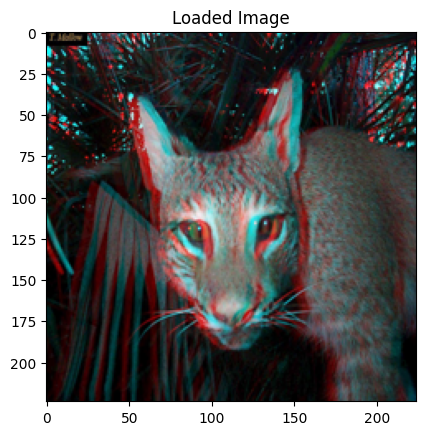

NameError: name 'vgg_model' is not defined

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Embedding, LSTM, Dense, Add, Flatten, Input
from tensorflow.keras.models import Model
from PIL import Image
import numpy as np
import requests
from io import BytesIO
import matplotlib.pyplot as plt

def load_image(image_path):
    if image_path.startswith('http'):
        response = requests.get(image_path)
        image = Image.open(BytesIO(response.content))
    else:
        image = Image.open(image_path)
    
    image = image.convert('RGB')
    image = image.resize((224, 224))
    image = np.array(image)
    return image

def preprocess_image(image):
    image = tf.keras.applications.vgg16.preprocess_input(image)
    return image

def extract_features(image):
    image = tf.expand_dims(image, axis=0)
    features = vgg_model.predict(image)
    features = Flatten()(features) 
    return features

image_path = 'https://i.pinimg.com/originals/26/55/aa/2655aa1acdbbafcb8b1e4ef1ce366cfe.jpg'
image = load_image(image_path)

plt.imshow(image / 255.0)  
plt.title('Loaded Image')
plt.show()

preprocessed_image = preprocess_image(image)
image_features = extract_features(preprocessed_image)

def create_captioning_model(vocab_size, embedding_dim, units):
    inputs1 = Input(shape=(7 * 7 * 512,)) 
    fe1 = Dense(256, activation='relu')(inputs1)

    inputs2 = Input(shape=(None,))
    x = Embedding(vocab_size, embedding_dim)(inputs2)
    x = LSTM(units)(x)
    x = Dense(256, activation='relu')(x)

    decoder_output = Add()([fe1, x])
    outputs = Dense(vocab_size, activation='softmax')(decoder_output)
    
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    return model

model = create_captioning_model(vocab_size=10000, embedding_dim=256, units=512)
model.summary()